In [17]:
pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from fastbook import *
from fastai.vision import *

In [19]:
import shutil
from pathlib import Path

In [20]:
pathIN = Path('/content/drive/MyDrive/Colab Notebooks/hongOS/Mushrooms (dataset JA).zip')
pathOUT = Path('/content/drive/MyDrive/Colab Notebooks/hongOS/Mushrooms (dataset JA)')
#shutil.unpack_archive(pathIN, pathOUT)

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
failed = verify_images(pathOUT)
failed

zip argument #1 must support iteration


(#0) []

In [23]:
mushrooms = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=66),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale = 0.3),
   batch_tfms=aug_transforms()
)

In [24]:
dls = mushrooms.dataloaders(pathOUT)

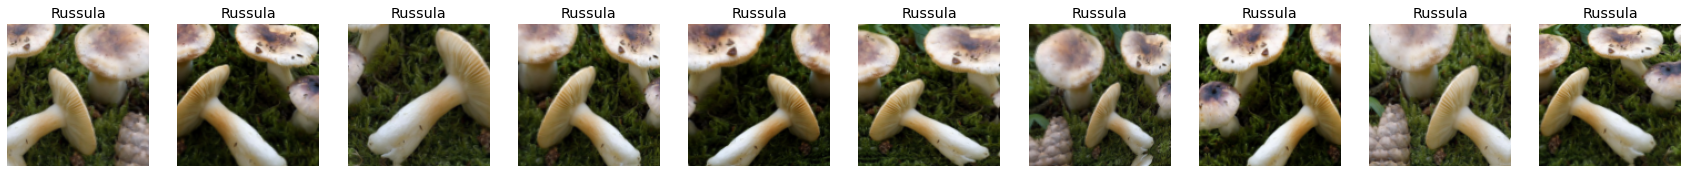

In [25]:
dls.train.show_batch(max_n = 10, nrows = 1, unique=True)

In [26]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [27]:
learn = vision_learner(dls, resnet50, metrics=accuracy)

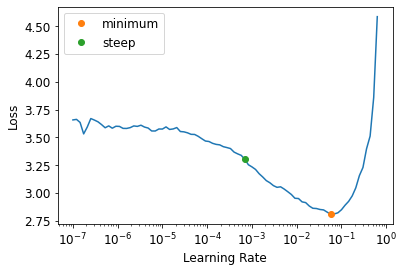

In [28]:
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [29]:
learn.fit_one_cycle(12, lr_max=5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.039353,1.481224,0.608793,01:16
1,1.485090,1.111662,0.657973,01:16
2,1.122758,1.053841,0.660954,01:16
3,0.967203,0.800757,0.722802,01:17
4,0.857637,1.182966,0.646796,01:16
5,0.781196,0.823496,0.730253,01:16
6,0.720047,0.903096,0.730253,01:16
7,0.620480,0.658910,0.776453,01:15
8,0.545354,0.657346,0.784650,01:16
9,0.485802,0.542611,0.821908,01:16


In [30]:
learn.unfreeze()

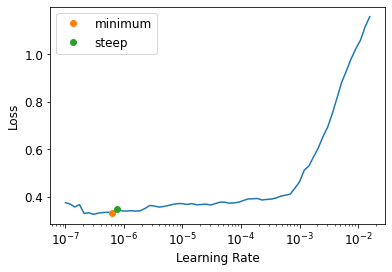

In [31]:
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
print("Steepest: "+str(lr_steep)+"\nMinimum: "+str(lr_min))

Steepest: 7.585775847473997e-07
Minimum: 3.6307807022240014e-06


In [32]:
#Usamos un learning rate discriminativo para entrenar las primeras capas de la red neuronal con un learning rate y las ultimas capas con un learning rate mas alto
#El pct_start indica el porcentaje de una epoca en el que el learning rate esta subiendo, aqui esta subiendo en el primer 80% de la epoca. En el 20% restante esta bajando lentamente
#learn.fit_one_cycle(8, lr_max=slice(5e-6,2e-3), pct_start=0.8, wd=0.9)
learn.fit_one_cycle(12, lr_max=slice(3e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.384867,0.524984,0.827869,01:19
1,0.370569,0.512841,0.830849,01:18
2,0.396717,0.516209,0.831595,01:18
3,0.380331,0.514115,0.835320,01:18
4,0.368259,0.516894,0.825633,01:20
5,0.364137,0.518680,0.825633,01:19
6,0.355731,0.524292,0.828614,01:19
7,0.343975,0.519699,0.830104,01:19
8,0.350513,0.494788,0.840537,01:19
9,0.339829,0.502637,0.833085,01:19


In [33]:
learn.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

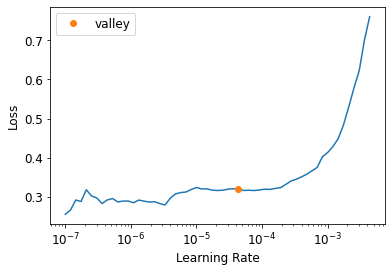

In [34]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(20, lr_max=slice(5e-5), pct_start=0.8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.346457,0.508473,0.830849,01:21
1,0.328491,0.494396,0.844262,01:19
2,0.342714,0.483417,0.842772,01:19
3,0.337390,0.499205,0.833085,01:19
4,0.337685,0.496424,0.839791,01:20
5,0.329527,0.490611,0.839791,01:19
6,0.312759,0.490357,0.841282,01:19
7,0.315595,0.484524,0.839791,01:18
8,0.317079,0.486285,0.842027,01:19
9,0.311858,0.494886,0.845007,01:19


In [36]:
learn.unfreeze()

SuggestedLRs(valley=9.999999747378752e-06)

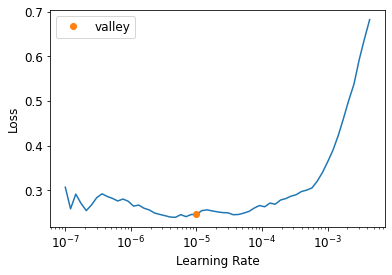

In [37]:
learn.lr_find()

In [38]:
learn.fit_one_cycle(12, lr_max=9e-5,pct_start=0.8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.251899,0.447880,0.857675,01:18
1,0.244425,0.460713,0.856185,01:20
2,0.253041,0.482853,0.850224,01:18
3,0.261832,0.497036,0.852459,01:18
4,0.273530,0.516177,0.842772,01:18
5,0.283035,0.605450,0.815201,01:18
6,0.284653,0.764734,0.789866,01:18
7,0.313473,0.604563,0.829359,01:20
8,0.289242,0.539185,0.833830,01:19
9,0.271635,0.555493,0.839046,01:18


In [ ]:
learn.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

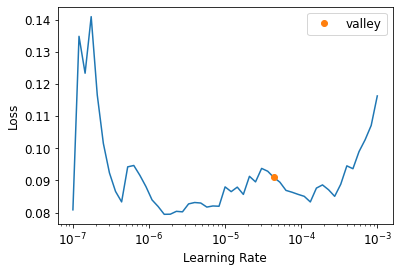

In [ ]:
learn.lr_find()

In [39]:
learn.fit_one_cycle(12, lr_max=slice(5e-6,5e-4),pct_start=0.8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.133478,0.397933,0.885246,01:20
1,0.136061,0.366539,0.891207,01:20
2,0.124198,0.372218,0.888227,01:19
3,0.120801,0.368673,0.891952,01:19
4,0.124817,0.383423,0.885246,01:19
5,0.117013,0.426793,0.878540,01:19
6,0.117328,0.430901,0.874069,01:18
7,0.115106,0.487764,0.860656,01:20
8,0.126853,0.475913,0.868107,01:19
9,0.122910,0.450152,0.875559,01:19


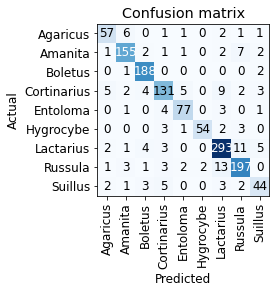

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

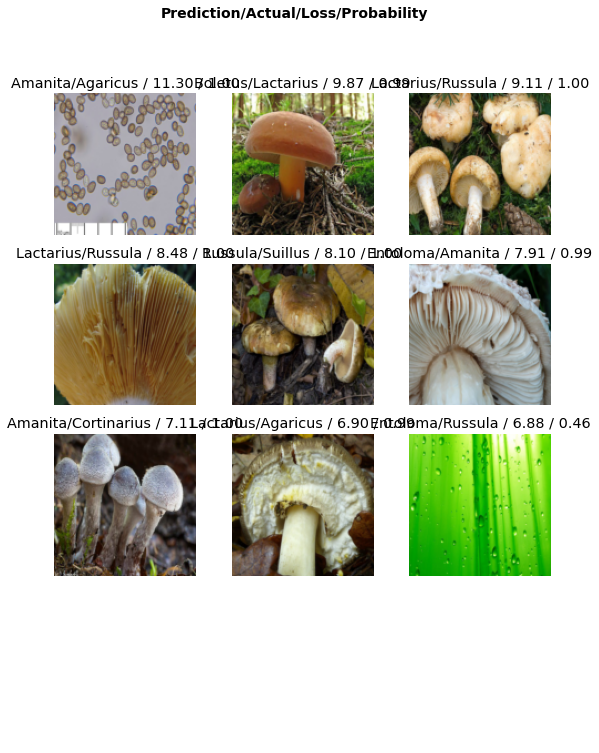

In [41]:
interp.plot_top_losses(10, nrows=4)

In [42]:
learn.export()

In [43]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]